In [19]:
import os
import os.path

import numpy as np
from numpy import typing as npt

from src import seg_datasets, utils
from matplotlib import pyplot as plt

In [10]:
def get_sentence_count_statistics(dataset: seg_datasets.SentenceEmbeddingDataset) -> npt.NDArray[np.int32]:
    sentences_count_statistic = []

    for item in dataset:
        sentences_count = item["sentence_embeddings"].shape[0]
        assert sentences_count == len(item["labels"])

        sentences_count_statistic.append(sentences_count)
    return np.array(sentences_count_statistic)

In [11]:
val_dataset = seg_datasets.SentenceEmbeddingDataset("../data/sentence_embeddings_val.jsonl", max_len=None)

sentences_count_statistic = get_sentence_count_statistics(val_dataset)

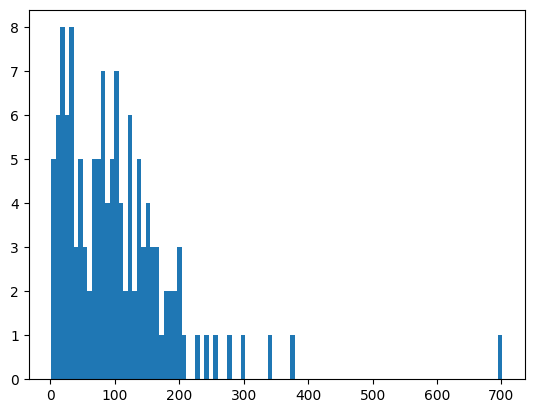

In [12]:
sentences_count_statistic = np.array(sentences_count_statistic)
plt.hist(sentences_count_statistic, bins=100)
plt.show()

In [13]:
print(f"Unlimited document size:")
print(f"Mean document size in sentences: {sentences_count_statistic.mean()}")
print(f"Max document size in sentences: {sentences_count_statistic.max()}")

Unlimited document size:
Mean document size in sentences: 101.66153846153846
Max document size in sentences: 701


In [14]:
val_dataset = seg_datasets.SentenceEmbeddingDataset("../data/sentence_embeddings_val.jsonl", max_len=2048)

sentences_count_statistic = get_sentence_count_statistics(val_dataset)

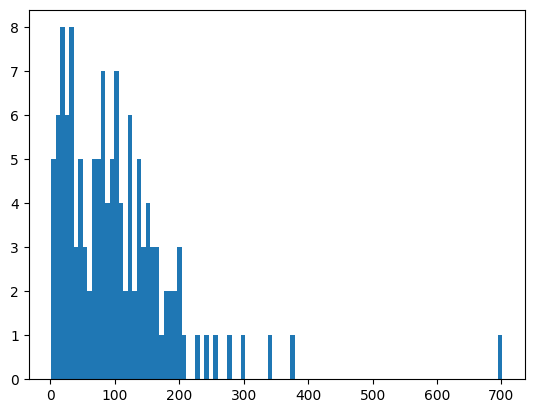

In [15]:
sentences_count_statistic = np.array(sentences_count_statistic)
plt.hist(sentences_count_statistic, bins=100)
plt.show()

In [16]:
print(f"Unlimited document size:")
print(f"Mean document size in sentences: {sentences_count_statistic.mean()}")
print(f"Max document size in sentences: {sentences_count_statistic.max()}")

Unlimited document size:
Mean document size in sentences: 101.66153846153846
Max document size in sentences: 701


In [25]:
for dataset in ["train.jsonl", "test.jsonl", "val.jsonl"]:
    print(dataset)
    data = utils.load_jsonl(os.path.join("../data", dataset))
    print(f"Document count: {len(data)}")
    sent_count = 0
    sentences_count_statistic = []
    for document in data:
        sent_count += len(document)
        sentences_count_statistic.append(len(document))

    sentences_count_statistic = np.array(sentences_count_statistic)
    print(f"Sentence count: {sent_count}")
    print(f"Mean sentence count: {sentences_count_statistic.mean()}")
    print(f"Max sent count: {sentences_count_statistic.max()}")
    print()

train.jsonl
Document count: 1040
Sentence count: 91751
Mean sentence count: 88.22211538461538
Max sent count: 642

test.jsonl
Document count: 130
Sentence count: 11634
Mean sentence count: 89.49230769230769
Max sent count: 383

val.jsonl
Document count: 130
Sentence count: 13216
Mean sentence count: 101.66153846153846
Max sent count: 701

